Silhouette Score: 0.7709609484860497

Random Sample of Data Points with Cluster Assignments:
     Feature 1  Feature 2  Cluster
203  -2.533810   2.928810        1
266  -2.033040   2.394492        1
152   2.989549   3.058664        0
9    -0.454012  -0.706152        2
233  -1.692917   3.378754        1
226  -2.492863   3.252023        1
196   2.339883   3.915729        0
109   2.757318   3.040937        0
5    -0.231709  -0.232865        2
175   3.155454   3.737678        0


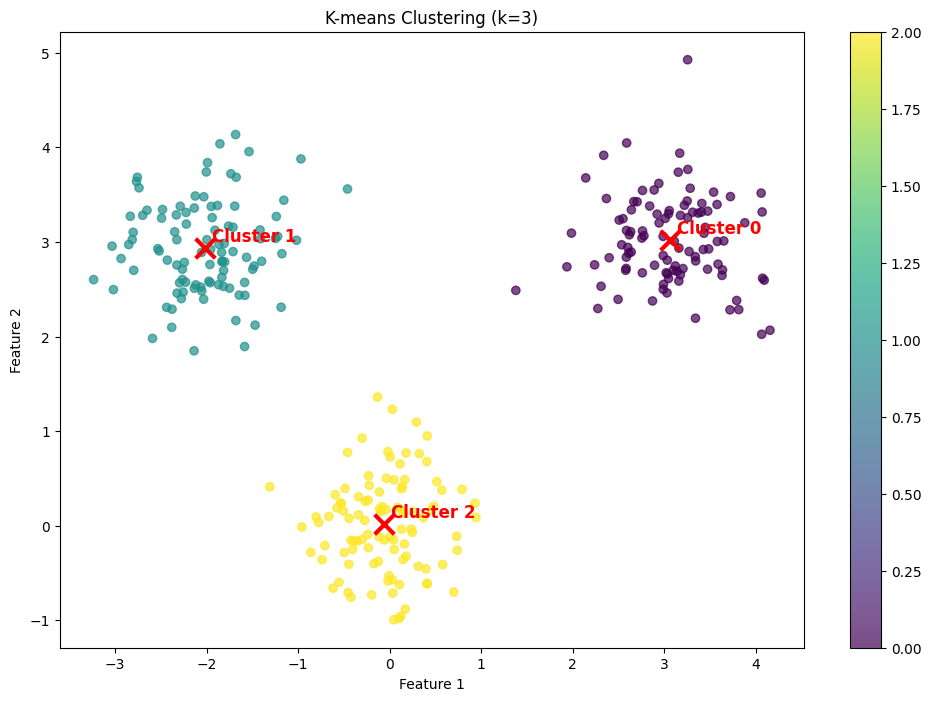

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Generate Sample Data with 3 Clusters
np.random.seed(42)  # For reproducibility
n_samples = 300

# Create three clusters
X1 = np.random.randn(n_samples // 3, 2) * 0.5
X2 = np.random.randn(n_samples // 3, 2) * 0.5 + [3, 3]
X3 = np.random.randn(n_samples // 3, 2) * 0.5 + [-2, 3]

# Combine all clusters
X = np.vstack((X1, X2, X3))

# Step 2: Perform K-means Clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X)

# Step 3: Evaluate the Clustering Model
silhouette_avg = silhouette_score(X, cluster_labels)
print(f'Silhouette Score: {silhouette_avg}')

# Combine the data points with their cluster labels
results = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
results['Cluster'] = cluster_labels

# Print random 10 entries including data points and their cluster assignments
random_sample = results.sample(n=10, random_state=42)  # random_state for reproducibility
print("\nRandom Sample of Data Points with Cluster Assignments:")
print(random_sample)

# Step 4: Visualize the Clustering Results
plt.figure(figsize=(12, 8))

# Plot the data points
scatter = plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)

# Plot the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, linewidths=3)

# Add titles and labels
plt.title(f'K-means Clustering (k={n_clusters})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(scatter)

# Add text annotations for each cluster
for i, center in enumerate(centers):
    plt.annotate(f'Cluster {i}', (center[0], center[1]), fontsize=12, fontweight='bold',
                 xytext=(5, 5), textcoords='offset points', color='red')

plt.show()
